In [3]:
import numpy as np
import pandas as pd
import json

### Load DataSet

In [7]:
meta = pd.read_csv('./data/movies_metadata.csv')

meta.head()

/var/folders/t9/m_58065n3n19hzdgh6st56t40000gn/T/ipykernel_2709/2146370213.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv('./data/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [8]:
meta = meta [['id', 'original_title', 'original_language', 'genres']]
meta = meta.rename(columns={'id':'movieId'})
meta = meta[meta['original_language']=='en']
meta.head()

,movieId,original_title,original_language,genres
0,862,Toy Story,en,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,8844,Jumanji,en,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,15602,Grumpier Old Men,en,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,31357,Waiting to Exhale,en,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,11862,Father of the Bride Part II,en,"[{'id': 35, 'name': 'Comedy'}]"


### 평가 데이터 불러오기
*ratings.csv* 파일은 크기가 너무 크므로 *ratings_small.csv* 파일 이용

In [9]:
ratings = pd.read_csv('./data/ratings_small.csv')
ratings = ratings[['userId', 'movieId', 'rating']]
ratings.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [10]:
ratings.describe()

,userId,movieId,rating
count,100004.000000,100004.000000,100004.000000
mean,347.011310,12548.664363,3.543608
std,195.163838,26369.198969,1.058064
min,1.000000,1.000000,0.500000
25%,182.000000,1028.000000,3.000000
50%,367.000000,2406.500000,4.000000
75%,520.000000,5418.000000,4.000000
max,671.000000,163949.000000,5.000000


### 데이터셋 가공 (Refine Dataset)
```
pd.to_numeric()
```
문자열을 숫자 타입으로 반환

In [11]:
meta.movieId = pd.to_numeric(meta.movieId, errors='coerce')
ratings.movieId = pd.to_numeric(ratings.movieId, errors='coerce')

In [8]:
def parse_genres(genres_str):
    genres = json.loads(genres_str.replace('\'', '"'))
    
    genres_list = []
    for g in genres:
        genres_list.append(g['name'])

    return genres_list

meta['genres'] = meta['genres'].apply(parse_genres)

meta.head()


,movieId,original_title,original_language,genres
0,862,Toy Story,en,"[Animation, Comedy, Family]"
1,8844,Jumanji,en,"[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,en,"[Romance, Comedy]"
3,31357,Waiting to Exhale,en,"[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,en,[Comedy]


### Merge meta and Ratings
```
pd.merge()
```
두 개의 데이터프레임을 병합

In [12]:
data = pd.merge(ratings, meta, on='movieId', how='inner')

data.head()

,userId,movieId,rating,original_title,original_language,genres
0,1,1371,2.5,Rocky III,en,"[{'id': 18, 'name': 'Drama'}]"
1,4,1371,4.0,Rocky III,en,"[{'id': 18, 'name': 'Drama'}]"
2,7,1371,3.0,Rocky III,en,"[{'id': 18, 'name': 'Drama'}]"
3,19,1371,4.0,Rocky III,en,"[{'id': 18, 'name': 'Drama'}]"
4,21,1371,3.0,Rocky III,en,"[{'id': 18, 'name': 'Drama'}]"


### Pivot Table
```
df.pivot_table()
```
피벗테이블을 만든다

In [13]:
matrix = data.pivot_table(index='userId', columns='original_title', values='rating')

matrix.head(20)

original_title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 + 1,12 Angry Men,1408,...,Young and Innocent,Zaat,Zabriskie Point,Zapped Again!,Zardoz,Zodiac,eXistenZ,xXx,¡Three Amigos!,Мой сводный брат Франкенштейн
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 피어슨 상관관계 (Pearson Correlation)

In [14]:
GENRE_WEIGHT = 0.1

def pearsonR(s1, s2):
    s1_c = s1 - s1.mean()
    s2_c = s2 - s2.mean()
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))

def recommend(input_movie, matrix, n, similar_genre=True):
    input_genres = meta[meta['original_title'] == input_movie]['genres'].iloc(0)[0]

    result = []
    for title in matrix.columns:
        if title == input_movie:
            continue

        # rating comparison
        cor = pearsonR(matrix[input_movie], matrix[title])
        
        # genre comparison
        if similar_genre and len(input_genres) > 0:
            temp_genres = meta[meta['original_title'] == title]['genres'].iloc(0)[0]

            same_count = np.sum(np.isin(input_genres, temp_genres))
            cor += (GENRE_WEIGHT * same_count)
        
        if np.isnan(cor):
            continue
        else:
            result.append((title, '{:.2f}'.format(cor), temp_genres))
            
    # 평점이 높은 순서대로 정렬
    result.sort(key=lambda r: r[1], reverse=True)

    return result[:n]


### 예측 (Prediction)
비슷한 장르의 영화를 10개 추천

In [15]:
recommend_result = recommend('Star Wars', matrix, 10, similar_genre=True)

pd.DataFrame(recommend_result, columns = ['Title', 'Correlation', 'Genre'])

/var/folders/t9/m_58065n3n19hzdgh6st56t40000gn/T/ipykernel_2709/199507330.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))


,Title,Correlation,Genre
0,When Saturday Comes,0.30,"[{'id': 18, 'name': 'Drama'}]"
1,Viva Zapata!,0.28,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na..."
2,Dead Poets Society,0.27,"[{'id': 18, 'name': 'Drama'}]"
3,Imagine Me & You,0.27,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name..."
4,Lara Croft: Tomb Raider,0.27,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
5,Aliens vs Predator: Requiem,0.26,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na..."
6,Match Point,0.26,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name..."
7,Secret Window,0.26,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ..."
8,The Lord of the Rings: The Two Towers,0.26,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
9,"Clean, Shaven",0.25,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name..."


### GUI 구현

In [1]:
import tkinter as tk

# 추천 함수를 불러오는 코드
def recommend_movie():
    movie_name = entry.get()
    recommendations = recommend(movie_name, matrix, 10, similar_genre=True)
    result_text.config(state='normal')
    result_text.delete(1.0, tk.END)
    for movie, correlation, genres in recommendations:
        result_text.insert(tk.END, f"Movie: {movie}, Correlation: {correlation}, Genres: {', '.join(genres)}\n")
    result_text.config(state='disabled')

# GUI 윈도우 생성
window = tk.Tk()
window.title("영화 추천기")

# 입력 필드 및 버튼 추가
label = tk.Label(window, text="영화 제목을 입력해주세요 :")
label.pack(pady=10)
entry = tk.Entry(window)
entry.pack(pady=5)
button = tk.Button(window, text="영화 추천", command=recommend_movie)
button.pack(pady=5)

# 추천 결과 텍스트 상자 추가
result_text = tk.Text(window, height=10, width=50)
result_text.pack(pady=10)
result_text.config(state='disabled')

# GUI 루프 시작
window.mainloop()


### 'recommend_result'의 결과 중 상관관계를 그래프로 표현

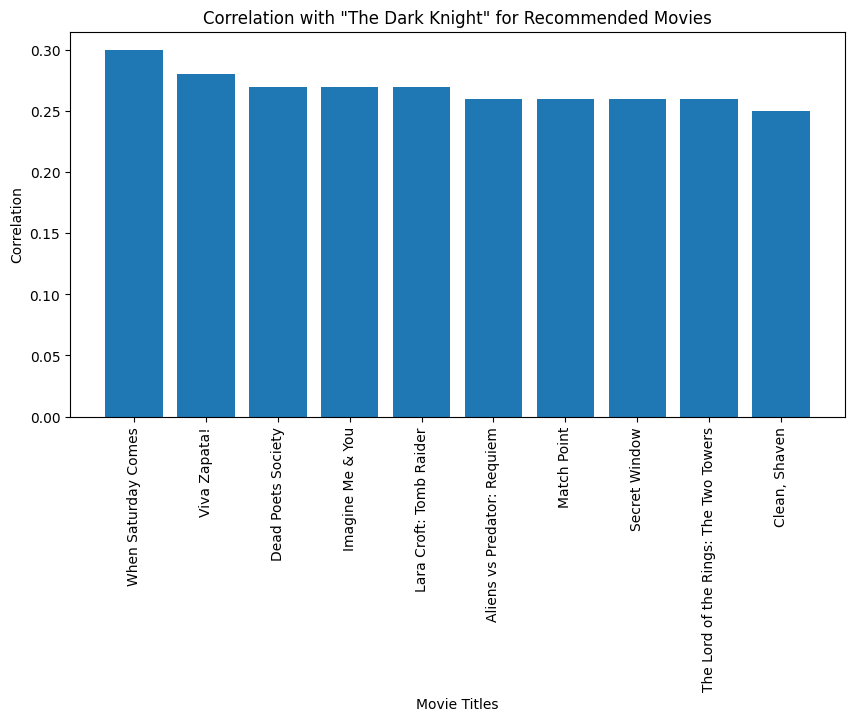

In [16]:
import matplotlib.pyplot as plt

# 추천 결과에서 상관관계 데이터 추출
correlation_values = [float(result[1]) for result in recommend_result]
movie_titles = [result[0] for result in recommend_result]

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.bar(movie_titles, correlation_values)
plt.xticks(rotation=90)
plt.xlabel('Movie Titles')
plt.ylabel('Correlation')
plt.title('Correlation with "The Dark Knight" for Recommended Movies')

plt.show()
